<a href="https://colab.research.google.com/github/brunomarschuck/2022PythonChick/blob/main/2%EC%A3%BC%EC%B0%A8%EB%AF%B8%EC%85%98(%EB%B8%8C%EB%A3%A8%EB%85%B8%EB%A7%88%EB%A5%B4%EC%8A%A4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 왼쪽에 있는 목차 보시면 더 편하게 보실 수 있습니다

# I. 아이들 성향을 고려한 모둠 만들기
- 질문방에 올라온 마음우주님의 코드를 변형하였다. 과제 수행 당시 마음우주님 링크가 없어서 링크 첨부는 못했다.
- 기본적인 흐름은 아래와 같다.
 1. 명단 작성 시 아이들 적극도, 발표 횟수 등에 따라 이름 뒤에 A, B, C를 붙여 그룹 나누기
 2. A그룹에서 2명, B그룹에서 3명, C그룹에서 1명을 랜덤하게 선택해서 Group1 만들기
 3. Group1에 들어간 아이들 제외한 나머지로 Group2 만들기
 4. 이런 식으로 Group3, Group4까지 만들기(총원 24명, 모둠당 6명)
 
 *아이디어: A, B, C 아이들을 랜덤하게 미리 섞어 놓고 뽑기
 - 사용한 파일 https://drive.google.com/file/d/10b56fEdPwJ8eYiGj1Y0ycf720x2x9ap6/view?usp=sharing

In [ ]:
ls

 sample_data/  '우리반명단(과제용).txt'


##(1) 매뉴얼하게 뽑아내기

In [ ]:
# 라이브러리 불러오기
import random

# 파일 불러오기
data = open('우리반명단(과제용).txt')
A = []
B = []
C = []

# A, B, C 리스트 만들기
for row in data :
  if row[-2] == 'A' :
    A.append(row.strip())
  elif row[-2] == 'B' :
    B.append(row.strip())
  else :
    C.append(row.strip())

# A, B, C 리스트 속 이름 랜덤하게 섞기
random.shuffle(A)
random.shuffle(B)
random.shuffle(C)

# A에서 2명, B에서 3명, C에서 1명씩 뽑아 모둠 구성하기
group1 = A[0:2] + B[0:3] + C[0:1] # +: 리스트 합치기
group2 = A[2:4] + B[3:6] + C[1:2]
group3 = A[4:6] + B[6:9] + C[2:3]
group4 = A[6:8] + B[9:12] + C[3:4]

# 모둠원 이름 출력하기
print(group1)
print(group2)
print(group3)
print(group4)

['박소담A', '최민식A', '이정은B', '한호열B', '이정재B', '하지원C']
['송강호A', '김혜수A', '송혜교B', '강새벽B', '라미란B', '송중기C']
['이경영A', '류승룡A', '배두나B', '유해진B', '조석봉B', '도강재C']
['마동석A', '설경구A', '고아성B', '전지현B', '하정우B', '황정민C']


## (2) 자동으로 뽑아내기

In [ ]:
# 마지막 부분 group1,2,3,4 하는 부분을 자동으로 뽑아냄

# 라이브러리 불러오기
import random

# 파일 불러오기
data = open('우리반명단(과제용).txt')
A = []
B = []
C = []

# A, B, C 리스트 만들기
for row in data :
  if row[-2] == 'A' :
    A.append(row.strip())
  elif row[-2] == 'B' :
    B.append(row.strip())
  else :
    C.append(row.strip())

# A, B, C 리스트 속 이름 랜덤하게 섞기
random.shuffle(A)
random.shuffle(B)
random.shuffle(C)

#groups 리스트 만들고 값 넣기
groups = []
for i in range(1, 5):
  groups.append(A[2*(i-1):2*i] + B[3*(i-1):3*i] + C[(i-1):i])

#모둠 뽑아내기
for group in groups:
  print(group)


['설경구A', '류승룡A', '이정은B', '배두나B', '라미란B', '송중기C']
['이경영A', '박소담A', '전지현B', '한호열B', '유해진B', '하지원C']
['송강호A', '김혜수A', '하정우B', '고아성B', '강새벽B', '황정민C']
['마동석A', '최민식A', '조석봉B', '이정재B', '송혜교B', '도강재C']


### 1-4 보다 0-3 쓰는 것에 익숙해지자

In [ ]:
# 위 코드의 마지막 부분은 이렇게 쓸 수도 있음
# 1-4 보다 0-3 쓰는 것에 익숙해져야 할 듯

groups = [A[2*i:2*i+2] + B[3*i:3*i+3] + C[i:i+1] for i in range(4)]

for group in groups:
  print(group)

['설경구A', '류승룡A', '이정은B', '배두나B', '라미란B', '송중기C']
['이경영A', '박소담A', '전지현B', '한호열B', '유해진B', '하지원C']
['송강호A', '김혜수A', '하정우B', '고아성B', '강새벽B', '황정민C']
['마동석A', '최민식A', '조석봉B', '이정재B', '송혜교B', '도강재C']


#II. 특정 성씨인 사람 뽑아내기
- 클래스101의 코드를 변형하여 만들었다
- 질문방에서 여러 가지 좋은 코딩 방식을 알게 되었다
- 검색 후에는 커서가 파일의 맨 끝으로 가기 때문에 반복 시에는 data.seek(0)을 써야 한다
- 사용한 파일 https://drive.google.com/file/d/10b56fEdPwJ8eYiGj1Y0ycf720x2x9ap6/view?usp=sharing

## (1) while 반복문 이중 사용

In [ ]:
# 특정 성씨인 사람 뽑아내기
while True:
  data = open('우리반명단.txt')
  surname = input('궁금한 성을 입력하세요 : ')
  names = []
  for row in data :
    if row[0] == surname :
      names.append(row.strip())
  if len(names) == 0:
    print('우리반에는 해당 성을 가진 사람이 없습니다.')
    data.seek(0)    # 커서를 파일의 맨 앞으로 이동
  else :
    print(surname + '씨 성을 가진 사람은 다음과 같습니다')
    print(names)
    data.seek(0)    # 커서를 파일의 맨 앞으로 이동

# 반복실행 여부 결정하기
  while True: 
    question = input('더 알아보시겠습니까? [1: 예, 2: 아니오] : ')
    if question == '1':
      break
    elif question == '2':
      break
    else :
      print('잘못 입력하셨습니다')
      continue
  if question == '2':
    break

궁금한 성을 입력하세요 : 송
송씨 성을 가진 사람은 다음과 같습니다
['송강호', '송중기', '송혜교']
더 알아보시겠습니까? [1: 예, 2: 아니오] : 1
궁금한 성을 입력하세요 : 김
김씨 성을 가진 사람은 다음과 같습니다
['김혜수']
더 알아보시겠습니까? [1: 예, 2: 아니오] : 3
잘못 입력하셨습니다
더 알아보시겠습니까? [1: 예, 2: 아니오] : 2


## (2) flag 사용

In [ ]:
# flag 사용한 버전

# 특정 성씨인 사람 뽑아내기
data = open('우리반명단.txt')
flag = False
while True:
  if not flag:          #not flag가 True일 때만 실행하기
    surname = input('궁금한 성을 입력하세요 : ')
    names = []
    for row in data :
      if row[0] == surname :
        names.append(row.strip())
    if len(names) == 0:
      print('우리반에는 해당 성을 가진 사람이 없습니다.')
      data.seek(0)
    else :
      print(surname + '씨 성을 가진 사람은 다음과 같습니다')
      print(names)
      data.seek(0)

# 반복실행 여부 결정하기
  question = input('더 알아보시겠습니까? [1: 예, 2: 아니오] : ')
  if question == '1':
    flag = False    #not flag가 True이므로 surname부터 다시 반복하게 됨
    continue
  elif question == '2':
    break           #코드를 종료함
  else :
    print('잘못 입력하셨습니다')
    flag = True     #not flag가 False이므로 surname 건너뛰고 question으로 오게 됨

궁금한 성을 입력하세요 : 김
김씨 성을 가진 사람은 다음과 같습니다
['김혜수']
더 알아보시겠습니까? [1: 예, 2: 아니오] : 2


#III. 중간기말고사 성적 그래프
- 재외한국학교는 초등도 중간기말고사가 있다
- 개인별로 성적 그래프를 만들었다
- 사용한 파일 https://drive.google.com/file/d/1Sz8ugMn0VyNJcobdz49cfIT7lQrdSfHA/view?usp=sharing

## (1) 과목별 성적 막대그래프

- 먼저 한글폰트를 설치해야 한다

In [ ]:
!apt-get install fonts-nanum -qq > /dev/null # 한글폰트설치
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


['김민준', '71', '68', '88', '84']


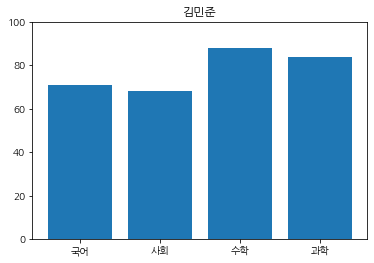

['마동석', '96', '100', '96', '94']


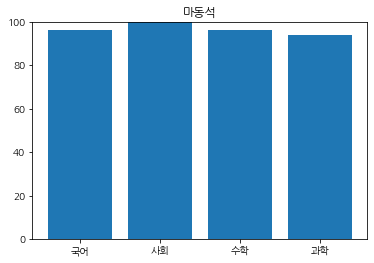

['류승룡', '84', '76', '88', '84']


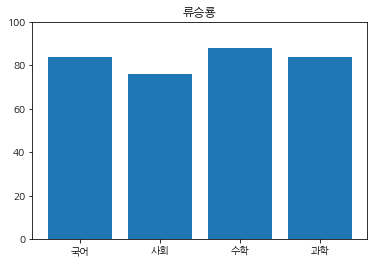

['유해진', '100', '100', '100', '100']


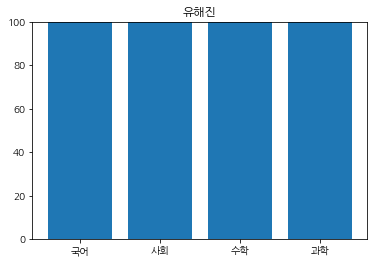

['고아성', '96', '84', '100', '76']


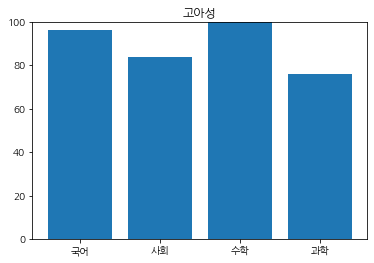

['이정재', '90', '80', '88', '72']


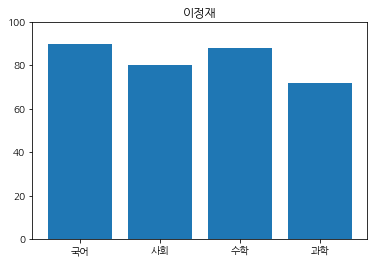

['하지원', '78', '40', '92', '60']


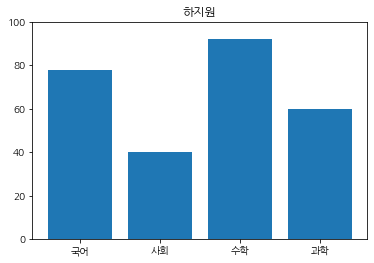

['송강호', '80', '64', '64', '70']


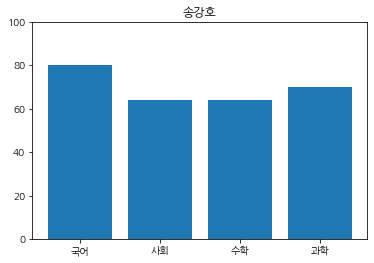

['이경영', '94', '100', '88', '96']


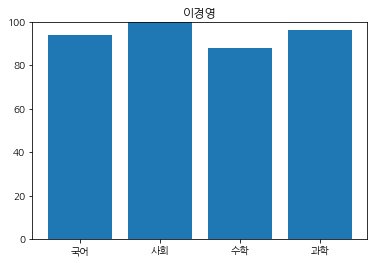

['배두나', '84', '100', '92', '98']


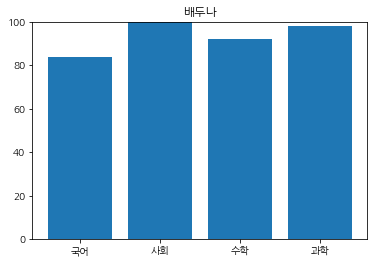

['이정은', '82', '84', '88', '84']


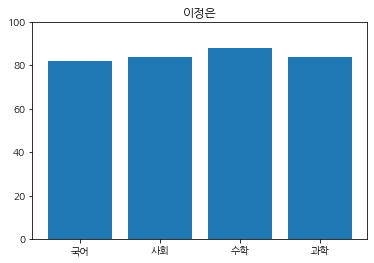

['하정우', '84', '76', '76', '70']


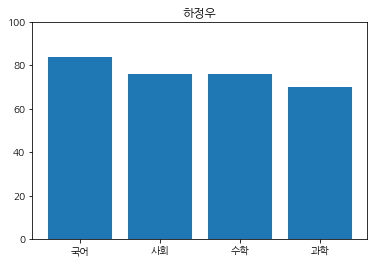

['송중기', '88', '92', '92', '96']


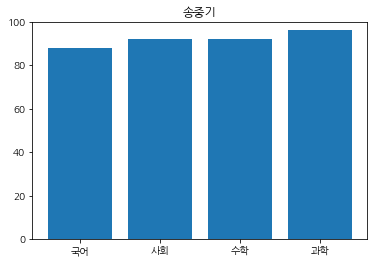

['설경구', '92', '80', '82', '80']


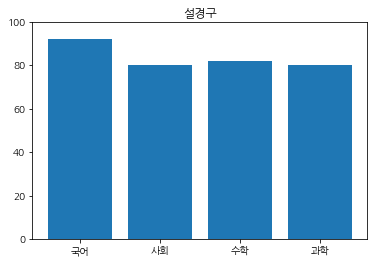

['최민식', '39', '28', '36', '30']


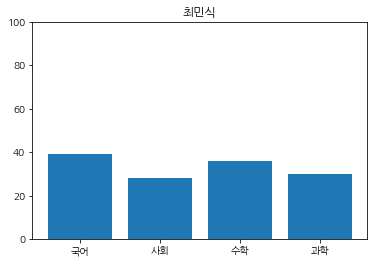

['라미란', '96', '100', '96', '94']


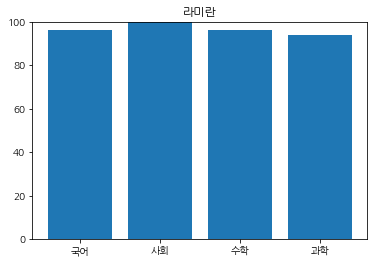

['홍혜교', '92', '92', '92', '90']


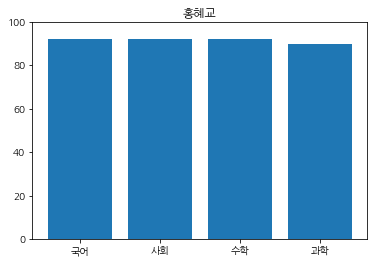

['전지현', '96', '96', '92', '100']


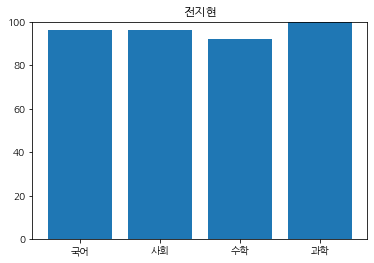

['황정민', '82', '80', '68', '36']


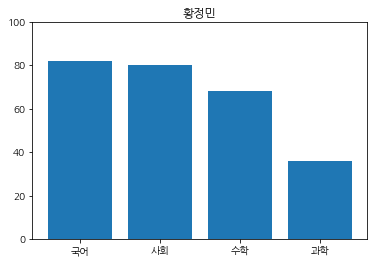

['김혜수', '88', '96', '96', '92']


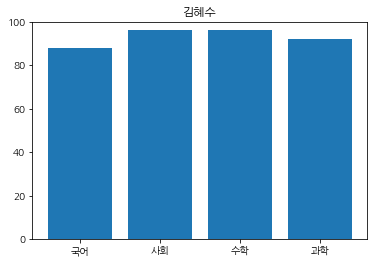

['박소담', '96', '100', '96', '100']


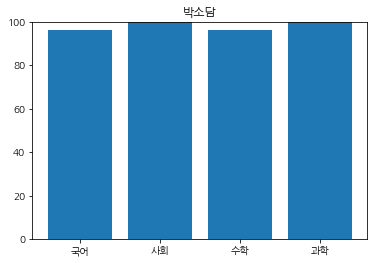

['아이유', '84', '96', '96', '84']


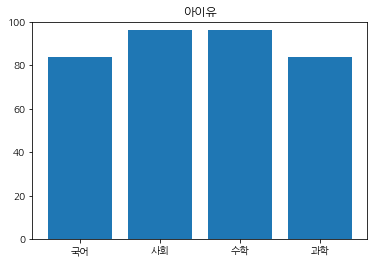

In [ ]:
import csv
data = csv.reader(open('1학기중간.csv', encoding ='cp949'))
mid1 = []
next(data)
for row in data :
  mid1.append(row)           # 학생들 성적 리스트 생성

import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')

for mid1_score in mid1 :
  print(mid1_score)           # 개인별 성적 리스트 생성
  plt.title(mid1_score[0])    # 그래프 타이틀을 각 학생의 이름으로
  ax = plt.gca()                  
  ax.set_ylim([0, 100])       # y축 범위 설정
  plt.bar(['국어','사회','수학','과학'], [int(i) for i in mid1_score[1:]]) # x값은 과목명, y값은 점수
  plt.show()

#IV. 청소역할분담(랜덤)
- 이히 님의 질문에 답하면서 코드를 변형했다
- 리스트가 비었는지 판단하는 부분이 포인트이다
- 사용한파일1 https://drive.google.com/file/d/10b56fEdPwJ8eYiGj1Y0ycf720x2x9ap6/view?usp=sharing
- 사용한파일2 https://drive.google.com/file/d/1aAkLS7FZnUTHaDccgjs4WwKoC9PK99BV/view?usp=sharing
- f string 쓰는 방법도 연습하면 좋을 것 같다

In [ ]:
import random
data1 = open('우리반명단.txt')
data2 = open('청소역할분담.txt')

name = []
role = []

for row in data1 :
  name.append(row.strip())

for row in data2 :
  role.append(row.strip())

while name != [] and role != []: #리스트가 비어 있지 않을 때 반복
  list1 = random.choice(name)
  list2 = random.choice(role)

  print('{a} 학생은 {b} 역할입니다.'.format(a=list1, b=list2))

  name.remove(list1)
  role.remove(list2)

  if name == [] and role == []:   #리스트가 둘 다 비어 있다면
    break

박소담 학생은 교탁 안 정리 역할입니다.
라미란 학생은 쓰레기통 주변 정리 역할입니다.
이정은 학생은 복도 쓸기 역할입니다.
마동석 학생은 책상 밀기 역할입니다.
고아성 학생은 교실쓸기(앞,뒤) 역할입니다.
김혜수 학생은 복도쪽 창틀 닦기 역할입니다.
류승룡 학생은 칠판 지우개 빨기 역할입니다.
배두나 학생은 교실쓸기(4분단) 역할입니다.
전지현 학생은 사물함 닦기 역할입니다.
하정우 학생은 교실쓸기(1분단) 역할입니다.
이정재 학생은 교실쓸기(6분단) 역할입니다.
황정민 학생은 교실쓸기(2분단) 역할입니다.
유해진 학생은 교실닦기(5,6분단) 역할입니다.
최민식 학생은 교실쓸기(5분단) 역할입니다.
송혜교 학생은 교실닦기(3,4분단) 역할입니다.
송중기 학생은 교실쓸기(3분단) 역할입니다.
이경영 학생은 교실닦기(1,2분단) 역할입니다.
송강호 학생은 교실닦기(앞,뒤) 역할입니다.
하지원 학생은 운동장쪽 창틀 닦기 역할입니다.
설경구 학생은 복도 닦기 역할입니다.


#V. 발표 도우미
- 학급 학생 입력 후 원하는 명 수 만큼 학생을 뽑는 프로그램
- 애플 선생님의 질문을 보고 코드를 변형했다


In [ ]:
import random
import time

name = []

while True :
  a1 = input('학생 이름을 입력해주세요. 입력이 끝나면 1을 입력해주세요 : ')
  name.append(a1)      # 리스트에 입력한 학생 이름 추가
  if a1 == '1' :
    break

print('반 학생 이름 입력이 완료되었습니다.')
name.remove('1')       # 리스트에서 1을 삭제
print(name)

time.sleep(1)

print('발표자 뽑기를 시작하겠습니다. ')
a2 = input('몇 명의 학생을 뽑고 싶으신가요? 숫자만 입력해주세요. : ')

student = random.sample(name,int(a2))
print(student)

학생 이름을 입력해주세요. 입력이 끝나면 1을 입력해주세요 : 최일구
학생 이름을 입력해주세요. 입력이 끝나면 1을 입력해주세요 : 박민석
학생 이름을 입력해주세요. 입력이 끝나면 1을 입력해주세요 : 김동우
학생 이름을 입력해주세요. 입력이 끝나면 1을 입력해주세요 : 강찬석
학생 이름을 입력해주세요. 입력이 끝나면 1을 입력해주세요 : 1
반 학생 이름 입력이 완료되었습니다.
['최일구', '박민석', '김동우', '강찬석']
발표자 뽑기를 시작하겠습니다. 
몇 명의 학생을 뽑고 싶으신가요? 숫자만 입력해주세요. : 2
['강찬석', '김동우']


#VI. 성적에 따른 모둠 편성
- 우리 스터디의 '토리야'님과 몇 시간을 씨름하면서 둘의 코드를 합쳤다
- 1번 과제의 확장판 같은 느낌이다

## (1) 성적 입력 후 ABC 판정
- 성적을 일일이 입력하는 게 좀 귀찮다. 나중에 txt 파일로 불러오는 걸로 업데이트하자
- 또는 애초에 csv 파일을 가져와도 좋을 것 같다.

### input으로 성적 입력
- 사용한 파일 https://drive.google.com/file/d/1Xki6OG8U-USSF5uUvehK3TzPoi0KTtd2/view?usp=sharing

In [ ]:
import random
import numpy as np

namelist = open('우리반명단.txt')
name_dict = {}
for row in namelist : 
  name_dict[row.strip()] = 0 

value_list = []
print("학생들의 이름이 나오면 성적을 입력해 주세요 : ")
for keys in name_dict :
  score = int(input(keys + ' : '))  # input 으로 받으면 str 데이터가 되므로 int 사용
  name_dict[keys] = score
  value_list.append(score)

A_value = int(np.percentile(value_list,75)) # float 값인 np도 int로 통일
C_value = int(np.percentile(value_list,25)) # 상위 하위 25퍼센트 점수

# print(A_value)  원하는 값이 맞는지 확인
# print(C_value)

items = name_dict.items()  # name_dict.items()는 딕셔너리의 (키, 값)들로 리스트를 만든 것

for k, v in items :
  if v >= A_value : 
    name_dict[k] = 'A'          # 점수가 상위 25퍼센트 이상이면 A
  elif v <= C_value : 
    name_dict[k] = 'C'          # 점수가 하위 25퍼센트 이하면 C
  else :
    name_dict[k] = 'B'          # 나머지는 B

for item in items :
  print(item)

### csv로 성적 입력
- 사용한 파일: https://drive.google.com/file/d/1dhtPGZ3MhJZeQxaD7ZaKk7ltoNVHaY7l/view?usp=sharing
- 이름과 성적으로 구성된 csv 파일을 불러온 후 딕셔너리를 만들자
- csv 파일 데이터는 이름, 국어, 사회, 수학, 과학, 평균으로 하면 된다.

In [ ]:
import csv
import random
import numpy as np

data = csv.reader(open('개인별성적(모둠용).csv', encoding = 'cp949'))
next(data)
name_mark = {}
mark_list = []
for row in data : 
  name_mark[row[0]] = float(row[5])    # {이름 : 평균} 딕셔너리 구성
  mark_list.append(float(row[5]))      # 평균점수 리스트 생성

# print(name_mark) # 원하는 값이 맞는지 확인
# print(mark_list)

A_value = np.percentile(mark_list,75)  # 상위 하위 25퍼센트 점수
C_value = np.percentile(mark_list,25) 

# print(A_value)  #원하는 값이 맞는지 확인
# print(C_value)

items = name_mark.items()  # name_mark.items()는 딕셔너리의 (키, 값)들로 리스트를 만든 것

for k, v in items :
  if v >= A_value : 
    name_mark[k] = 'A'          # 점수가 상위 25퍼센트 이상이면 A
  elif v <= C_value : 
    name_mark[k] = 'C'          # 점수가 하위 25퍼센트 이하면 C
  else :
    name_mark[k] = 'B'          # 나머지는 B

for item in items :
  print(item)

('마동석', 'A')
('류승룡', 'B')
('유해진', 'A')
('고아성', 'A')
('이정재', 'A')
('하지원', 'B')
('송강호', 'B')
('이경영', 'A')
('배두나', 'B')
('이정은', 'B')
('하정우', 'B')
('송중기', 'C')
('설경구', 'B')
('최민식', 'C')
('라미란', 'B')
('송혜교', 'B')
('전지현', 'C')
('황정민', 'B')
('김혜수', 'C')
('박소담', 'C')


## (2) 모둠 배정
- 모둠 수를 정하면 코딩이 너무 복잡해져서 모둠원 수를 정하는 것으로 하려 했지만..
- 이마저도 지금 실력으론 힘들어 모둠원은 4명으로 고정하였다
- 남는 인원은 교사가 수동배정 하면 된다

### 모둠원 4명으로 고정

In [ ]:
# A, B, C 리스트 만들기
A = []
B = []
C = []

for item in items :
  if item[1] == 'A' :   # item 리스트에서 A, B, C 확인
    A.append(item[0])   # 해당하는 이름을 A, B, C 리스트에 추가
  elif item[1] == 'B' : 
    B.append(item[0])
  else :
    C.append(item[0])

# A, B, C 리스트 속 이름 랜덤하게 섞기
random.shuffle(A)
random.shuffle(B)
random.shuffle(C)

# 배정하기(A 1명, B 2명, C 1명)
groups = []
for i in range(20):           # 학급 학생 수가 80명을 넘진 않을 것이므로 20까지
  groups.append(A[i:i+1] + B[2*i:2*i+2] + C[i:i+1])

# 출력하기
print('자동 구성된 모둠은 다음과 같습니다')
for group in groups :
  if len(group) == 4 :        # 4명 모두 구성된 모둠 출력
    print(group)


print('남는 학생은 다음과 같습니다')
for group in groups :
  if 0 < len(group) < 4 :
    print(group)
print('남는 학생이 없는 경우 모두 자동 배정된 것입니다')

자동 구성된 모둠은 다음과 같습니다
['마동석', '이정은', '송혜교', '김혜수']
['이정재', '류승룡', '황정민', '박소담']
['고아성', '송강호', '라미란', '최민식']
['이경영', '배두나', '하지원', '전지현']
['유해진', '설경구', '하정우', '송중기']
남는 학생은 다음과 같습니다
남는 학생이 없는 경우 모두 자동 배정된 것입니다


### 모둠원 수 선택
- 나중에 실력이 더 쌓이면 시도해보자